# Project 3 for Introduction Of Neural Networks Subject (2023.1)

## Name: Gabriel Vicente Rodrigues
## NUSP: 11795377
## Email: gabriel_vr@usp.br

The objective of this project is to illustrate the construction of a model using a transfer learning technique.

## Initial Configurations

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

2023-07-09 21:07:01.908309: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-09 21:07:01.910283: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-09 21:07:01.955375: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-09 21:07:01.956151: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-09 21:07:02.771295: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [3]:
path = './data/dataset'

## Question 1

### Create the following CNN using Keras:
* Convolutional part of the MobileNetV2 network;
    * The model must be configured to receive RGB images with 128x128 dimension;
    * All the parameters must be frozen;
    * The parameters used must be those from the pre trained Imagenet model;
* A dense layer with softmax activation function;
* Adam optimizer;
* Cross-entropy loss;
* Accuracy as success metric;

In [4]:
#Instantiate base model with pre trained featureas a set as non trainable
baseModel = tf.keras.applications.mobilenet_v2.MobileNetV2(
    input_shape=(128, 128, 3),
    weights='imagenet',
    include_top=False
)

baseModel.trainable = False

In [5]:
# input layer
inputs = tf.keras.Input((128, 128, 3))


In [6]:
# output layers
flatttenLayer  = tf.keras.layers.Flatten()
denseLayer = tf.keras.layers.Dense(7, activation='softmax')

In [7]:
#putting all together
#x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs)
x = baseModel(inputs, training=False)
x = flatttenLayer(x)
outputs = denseLayer(x)
model = tf.keras.Model(inputs, outputs )


model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 mobilenetv2_1.00_128 (Funct  (None, 4, 4, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 20480)             0         
                                                                 
 dense (Dense)               (None, 7)                 143367    
                                                                 
Total params: 2,401,351
Trainable params: 143,367
Non-trainable params: 2,257,984
_________________________________________________________________


In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


## Question 2

### Train the model using the following protocol:
* Allow the training data to be distorted using the following transformations:
    * horizontal_flip=True;
    * zoom_range=0.2;
    * shear_range=10;
    * height_shift_range=0.1;
    * width_shift_range=0.1;
* Using mini-batches of 32 images;
* The model must be trained for 10 epochs, which means it will proccess a number of images 10 times bigger than the training dataset;
* Keep up with the accuracy of the model for the train and test dataset by the end of each epoch;

In [9]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=10,
    height_shift_range=0.1,
    width_shift_range=0.1,
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)
train_generator = train_datagen.flow_from_directory(
        path + '/train',
        batch_size=32,
        shuffle=False,
        target_size=(128, 128),
    )

Found 2284 images belonging to 7 classes.


In [10]:
history = model.fit(train_generator, epochs=10)

Epoch 1/10


2023-07-09 21:07:05.786750: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


72/72 [==============================] - 14s 159ms/step - loss: 10.8802 - accuracy: 0.3542
Epoch 2/10
72/72 [==============================] - 12s 162ms/step - loss: 2.9116 - accuracy: 0.7434
Epoch 3/10
72/72 [==============================] - 11s 156ms/step - loss: 0.9412 - accuracy: 0.8511
Epoch 4/10
72/72 [==============================] - 12s 162ms/step - loss: 0.4947 - accuracy: 0.9063
Epoch 5/10
72/72 [==============================] - 11s 154ms/step - loss: 0.7430 - accuracy: 0.8673
Epoch 6/10
72/72 [==============================] - 12s 160ms/step - loss: 0.3143 - accuracy: 0.9282
Epoch 7/10
72/72 [==============================] - 12s 166ms/step - loss: 0.2778 - accuracy: 0.9335
Epoch 8/10
72/72 [==============================] - 11s 156ms/step - loss: 0.2649 - accuracy: 0.9370
Epoch 9/10
72/72 [==============================] - 12s 165ms/step - loss: 0.2255 - accuracy: 0.9413
Epoch 10/10
72/72 [==============================] - 12s 160ms/step - loss: 0.9596 - accuracy: 0.8586

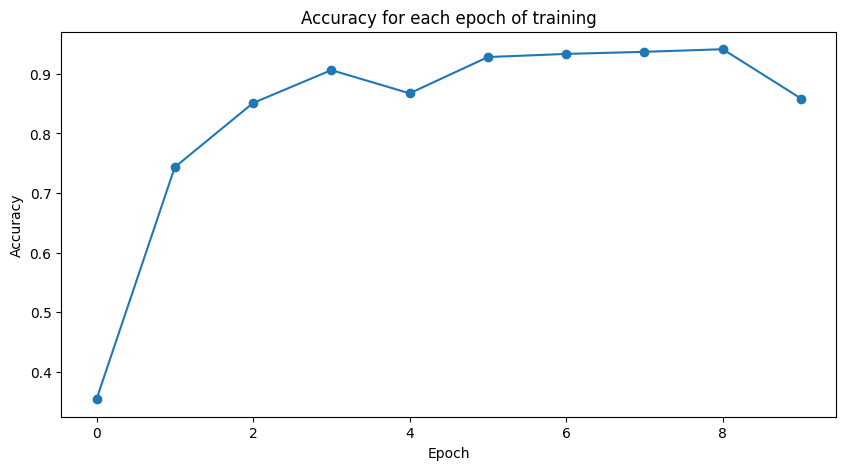

In [11]:
history.history
plt.figure(figsize=(10, 5))
plt.title("Accuracy for each epoch of training")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(range(len(history.history['accuracy'])), history.history['accuracy'], marker='o')


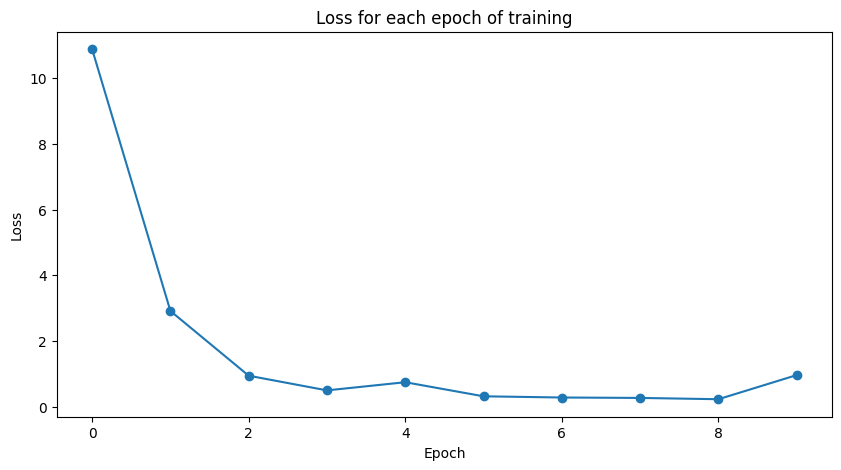

In [12]:
plt.figure(figsize=(10, 5))
plt.title("Loss for each epoch of training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(range(len(history.history['loss'])), history.history['loss'], marker='o')

In [13]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(
        path + '/test',
        batch_size=32,
        shuffle=False,
        target_size=(128, 128),
    )

Found 1400 images belonging to 7 classes.


In [14]:
evaluation = model.evaluate(test_generator, verbose=2)

2023-07-09 21:09:04.790160: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


44/44 - 7s - loss: 8.5780 - accuracy: 0.1721 - 7s/epoch - 156ms/step


In [15]:
print("The test dataset obtained a accuracy of {} percent with a loss of {}.".format(evaluation[1]*100, evaluation[0]))

The test dataset obtained a accuracy of 17.21428632736206 percent with a loss of 8.578015327453613.


The accuracy graph shows that it increases pretty fast after the first two epochs and then tries to stabilize around the 90% range. For the test dataset, the accuracy drops 3 percent, which is fine for our purposes. 

These results are pretty good, indicating the flexibility of using pre trained features to train a new model with less entries in the dataset.